## 1. 資料讀入, 預處理

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,"鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管機關，可是此案送進環評大會後，卻投票翻案通過，環保署前副署長詹順貴辭職明志、更在聲明上直言：「既有環評制度的社會信任基礎受到嚴重傷害」。桃園市長鄭文燦選前選後不同臉,更被環團公認「背信忘義」。\n選後中油火速動工三接 ，學聖感於《環評法》改革的聲音未曾中斷，藻礁因三接被開腸破肚案更凸顯許多環評制度現有的缺失和重要性， 今日學聖與潘忠政老師、環境法律人協會張譽尹理事長 、台灣蠻野足心生態協會蔡雅瀅律師、國立台灣大學風險社會與政策研究中心林木興助理研究員、財團法人環境權保障基金會郭鴻儀律師等一同討論《環評法》修正草案，學聖也承諾將於新會期開始送出修法草案。",NaN,photo,https://www.facebook.com/244784245612709/posts/2052039854887130/,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [31]:
# 查看立委名冊
politics.head(1)

,縣市,選區,姓名,在任狀態,政黨,政見,備註
0,台北,一,吳思瑤,1.0,民主進步黨,1、北投天母宜居社區 改善天母交通，拒絕大型開發，保存綠地與文化資產。 爭取復興崗國防大學校地釋出，中央地方協力規劃「社會 住宅+長照基地+智慧型社福研發中心+綠地公園+國防」五 合一生態社區。 加速推動士北科技園區，打造生技、資通訊產業科技城。 停建北纜，保存生態文史，結合溫泉觀光醫療，規劃北投 生活環境博物園區。 2、世代正義 推動年金改革，健全財政紀律。 推動社會住宅，減輕購屋負擔。 媒合青年創／就業資源，擴大輔導補助，改善勞動條件， 提升薪資水平。 推動稅制改革，縮小貧富差距，調漲基本工資，提高企業 納稅責任。 推動憲改，降低投票年齡至十八歲。 拒絕黑箱課綱，教育不受政治干預。 3、社會安全 強化食安監理，落實生產管理、查驗。 推動「托育、長照、就業」三合一政策。 托育服務社區／平價／優質化。推動留職育嬰、育嬰彈性 工時。 建立永續長照，推動社區型整合服務中心，結合在宅服 務、居家醫護、餐食服務、樂齡學堂，落實在地安老。 性別平等職場，提高婦女就業安全與薪資水平。 4、進步國家 開放政府，推廣柯P經驗，優化公民參與、資訊公開制度。 還權於民，修訂公投法、選罷法，降低公投門檻及罷免限 制。 環境正義，推動產業升級，發展綠能產業，提高環境汙染 稅，落實非核家園。 司法改革，落實民主／專業／透明化司法體系。 國會改革，拒絕密室協商，落實國會專業資深制。 追討黨產，政黨不當得利還財於民。 堅守台灣主體性，穩定兩岸和平發展，嚴格監督各項兩岸 合作協議。,NaN


In [5]:
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [6]:
fb.page_name.unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

## 2. 使用呂孫綾作為查看對象

In [32]:
lu = fb.loc[fb.page_name == '呂孫綾']
lu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts/2266532516703808/,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,NaN,NaN,257,0,0,0,0,0,8,8


In [8]:
lu.loc[lu.created_time_taipei == max(lu.created_time_taipei),
      "created_time_taipei"]
# 蒐到的fb資料中，最晚的日期是`2019-12-11T12:33:58+0000`

7179    2019-12-11T20:33:58
Name: created_time_taipei, dtype: object

In [9]:
lu.loc[lu.created_time_taipei == min(lu.created_time_taipei),
      "created_time_taipei"]
# 蒐到的fb資料中，最早的日期是 `2019-01-03T14:19:05`

6759    2019-01-03T14:19:05
Name: created_time_taipei, dtype: object

In [34]:
lu.loc[:,'new_date'] = pd.to_datetime(lu['created_time_taipei']).dt.date
lu.loc[:,'month_year'] = pd.to_datetime(lu['new_date']).dt.to_period('M')
lu['post_hour'] = pd.to_datetime(lu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)

lu.head(1)

/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts/2266532516703808/,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,0,0,0,0,0,8,8,2019-01-15,2019-01,11


In [39]:
#發文時間分佈
post_time = lu[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,6,1
1,7,10
2,8,31
3,9,43
4,10,38
5,11,37
6,12,30
7,13,22
8,14,27
9,15,27


In [87]:
#整年貼文數量分佈
whole_year = lu[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)

,month_year,post_id
0,2019-01,30
1,2019-02,25
2,2019-03,26
3,2019-04,20
4,2019-05,42
5,2019-06,40
6,2019-07,34
7,2019-08,33
8,2019-09,51
9,2019-10,62


In [88]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,12.000000
mean,39.666667
std,17.473790
min,20.000000
25%,29.000000
50%,33.500000
75%,44.250000
max,81.000000


/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


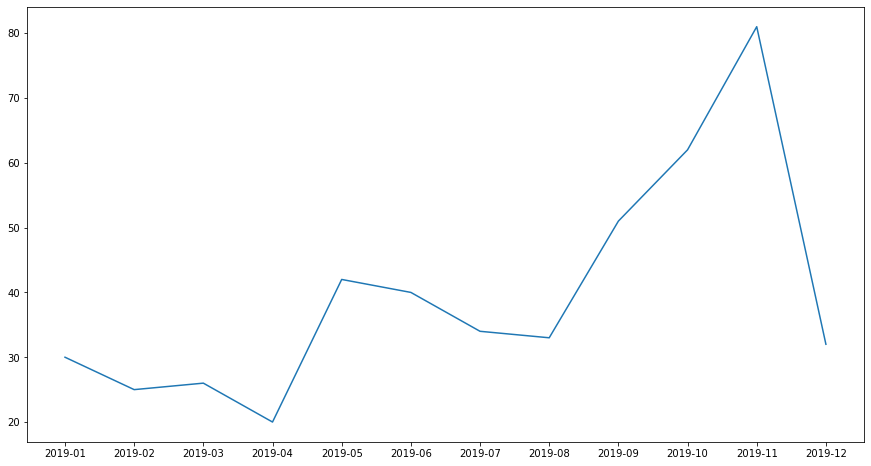

In [93]:
#畫出整年貼文分佈
# labels = results['newhead'].map(str)
labels = whole_year.month_year.map(str)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

## 3. 將 `lu` 的欄位，按照月份groupby後加總

即可計算出呂孫綾的每月聲量數值

In [14]:
## 先再看一次 `lu` 的每個欄位
lu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts/2266532516703808/,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,257,0,0,0,0,0,8,8,2019-01-15,2019-01


In [15]:
results = lu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,27965206804191492,11191,0,0,0,0,0,322,448
2019-02,23304339003492912,14271,0,0,0,0,0,537,438
2019-03,24236512563632628,21936,0,0,0,0,0,1206,567
2019-04,18643471202794332,14598,0,0,0,0,0,628,377
2019-05,39151289525868096,29616,0,0,0,0,0,1760,875
2019-06,37286942405588656,33459,0,0,0,0,0,1122,834
2019-07,31693901044750356,29916,0,0,0,0,0,1154,860
2019-08,30761727484610640,72061,0,0,0,0,0,2929,1337
2019-09,47540851567125576,102168,0,0,0,0,0,4358,1863


稍微了解一下 `like_count`,`share_count`,`comment_count` 這三個等等會視覺化觀察的指標

In [16]:
results.loc[:,['like_count','share_count','comment_count']].describe()

,like_count,share_count,comment_count
count,12.000000,12.000000,12.000000
mean,61481.083333,1295.500000,2694.083333
std,59274.836681,1033.626053,2687.919150
min,11191.000000,377.000000,322.000000
25%,20101.500000,537.250000,998.500000
50%,31687.500000,867.500000,1483.000000
75%,79587.750000,1602.000000,3648.500000
max,194904.000000,3762.000000,9501.000000


In [17]:
results.loc[:,['like_count','share_count','comment_count']].agg([min,max])

,like_count,share_count,comment_count
min,11191,377,322
max,194904,3762,9501


In [18]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results.head()

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,27965206804191492,11191,0,0,0,0,0,322,448
1,2019-02,23304339003492912,14271,0,0,0,0,0,537,438
2,2019-03,24236512563632628,21936,0,0,0,0,0,1206,567
3,2019-04,18643471202794332,14598,0,0,0,0,0,628,377
4,2019-05,39151289525868096,29616,0,0,0,0,0,1760,875


In [19]:
tmp = results['newhead'].map(str)
isinstance(tmp[0],str)
## 將`newhead`轉為str, 準備作為圖片label

True

## 4. 將呂孫綾每月 fb 聲量視覺化

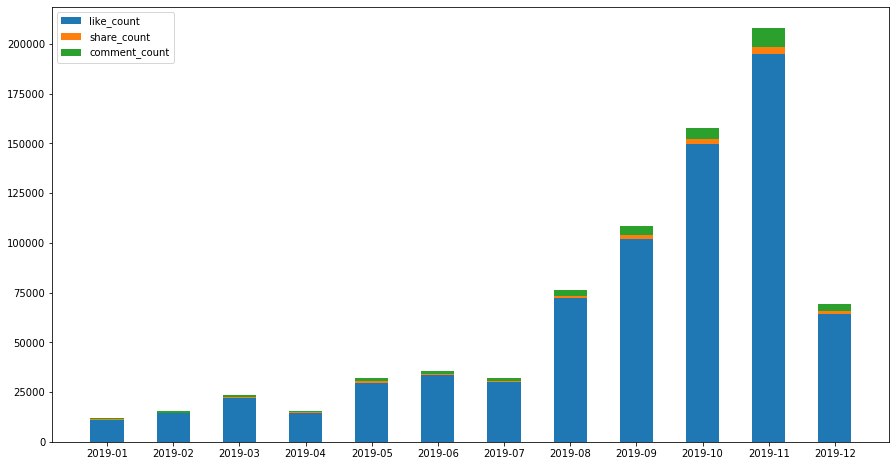

In [20]:
labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()
plt.show()

可以觀察到，呂孫綾的臉書聲量顯然是隨著選舉熱度逐漸升高。
而綜合選前的時事，我決定觀察兩個重點

1. 呂孫綾上館長節目是在11/23
2. 12的聲量為何突然跌落

In [94]:
# 將11月的資料取出來

nov = lu.loc[lu.month_year == "2019-11"].groupby('new_date').sum()
nov.head()

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-11-01,1864347120279434,6253,0,0,0,0,0,199,86,25
2019-11-02,1864347120279434,4214,0,0,0,0,0,170,36,23
2019-11-03,1864347120279434,3625,0,0,0,0,0,134,47,31
2019-11-04,932173560139717,1977,0,0,0,0,0,62,55,17
2019-11-05,932173560139717,6229,0,0,0,0,0,164,99,9


In [22]:
## 最多討論
nov.loc[nov.like_count == max(nov.like_count),['like_count']]

,like_count
new_date,
2019-11-29,18024


In [23]:
nov.index.name = 'the_date'
nov.reset_index(inplace=True)
nov.head()

,the_date,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-11-01,1864347120279434,6253,0,0,0,0,0,199,86
1,2019-11-02,1864347120279434,4214,0,0,0,0,0,170,36
2,2019-11-03,1864347120279434,3625,0,0,0,0,0,134,47
3,2019-11-04,932173560139717,1977,0,0,0,0,0,62,55
4,2019-11-05,932173560139717,6229,0,0,0,0,0,164,99


In [24]:
len(nov['like_count'])

30

In [25]:
nov.shape[0]

30

/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


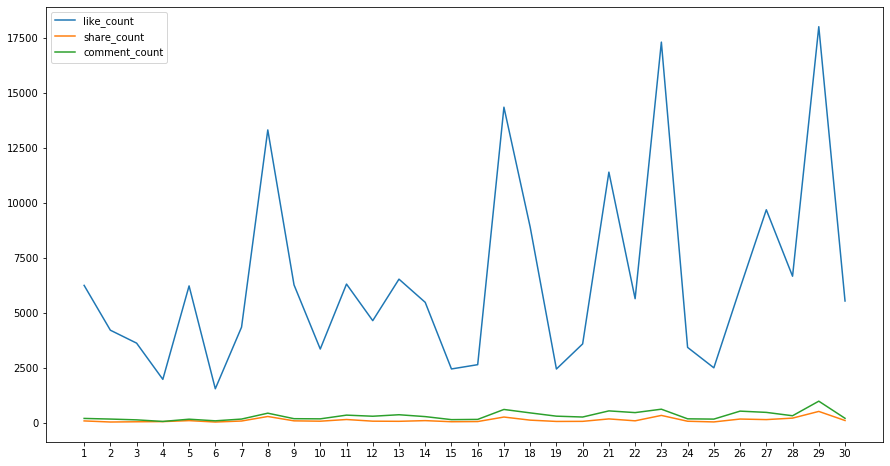

In [26]:
#labels = nov.the_date.map(lambda i: str(i))
labels = [str(i) for i in range(1,nov.shape[0]+1)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, nov['like_count'], label = 'like_count')
ax.plot(labels, nov['share_count'], label = 'share_count')
ax.plot(labels, nov['comment_count'], label = 'comment_count')

ax.legend()

plt.show()

較高的時間點有 8, 17, 23, 29這四天，因此我們依序取出這四天的文章來觀察

我先將11月每天的發文總數計算出來，可以發現其實只有17號發了較多篇文章，另外三個聲量較高的日期，並沒有特別發比較多的臉書文。

In [96]:
lu.loc[lu.month_year == '2019-11'].new_date.value_counts()

2019-11-17    5
2019-11-21    4
2019-11-26    4
2019-11-13    4
2019-11-11    4
2019-11-30    4
2019-11-12    4
2019-11-28    4
2019-11-08    3
2019-11-14    3
2019-11-27    3
2019-11-09    3
2019-11-20    3
2019-11-23    3
2019-11-22    3
2019-11-29    3
2019-11-01    2
2019-11-02    2
2019-11-10    2
2019-11-03    2
2019-11-15    2
2019-11-16    2
2019-11-19    2
2019-11-07    2
2019-11-18    2
2019-11-24    2
2019-11-06    1
2019-11-25    1
2019-11-05    1
2019-11-04    1
Name: new_date, dtype: int64

接著，再把8號發的文章內容取出檢視：

In [99]:
lu.new_date.loc[:] = lu.new_date.map(lambda d: str(d))
nov_8 = lu.loc[lu.new_date == '2019-11-08']
nov_8[['message','comment_count']].replace(r'\n', ' ', regex = True)

/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,message,comment_count
7113,原來，呂孫綾吃了酸梅也會那麼酸！,176
7114,家有3歲以下幼兒的好朋友，呂孫綾報乎您知！ 👨‍👩‍👧👪 今年8月準公共化幼兒園政策正式啟動， 0-2歲送保母或托嬰中心，有托育補助，3-6歲去上學有學費補助。但是2-3歲的小朋友，如果沒去幼兒園，是由保母或托嬰中心照顧，卻沒有辦法再領托育補助。 經過各方努力與爭取，政府從明年開始，2-3歲繼續給公共托育照顧的孩子，可以繼續領每月3000元補助；繼續給準公共保母、準公共托嬰中心照顧的小孩，也可以繼續領每月6000元補助。讓台灣的孩子，由政府共同支持、一起照顧，減輕父母的經濟負擔。 此外，政府還要每年增設2歲專班，並持續投入資源，2024年將增加2歲專班800班，提供1萬2000個招生名額，希望藉由這樣的政策引導，能夠減輕父母、家長照護孩子的壓力！ ☎️詳情請打免付費福利諮詢專線：1957 #好政策報乎您知呂孫綾😘😘 #減輕家庭父母照顧孩子的負擔👨‍👩‍👧👨‍👩‍👧👪👪 #繼續要求政府投入資源增設2歲專班❤️❤️ #不分大小事認真做好幼托事,185
7115,大家早安！😘😘😘 今天立冬，明天又是星期六，準備買菜了嗎？🥬🌽🍅🥦🍆🥕 阿北已經90歲了，但是每天都活力衝勁十足，在菜市場裡熱情招呼客人。每天充滿樂觀正能量，就是我每天動力的來源，也希望能傳遞給大家喔！ #活力衝勁呂孫綾🏋️‍♀️🏋️‍♀️🏋️‍♀️ #90歲依然要活力滿滿充滿樂觀❤️❤️ #老薑辣南瓜甜地瓜葉嫩山藥養生🍚🥗 #不分大小事認真做好家鄉事,77


在8號的文章，其實沒有什麼太特別的內容。


在 11/23 號的按讚數量特別高，推測跟上館長的節目有關係。但這些讚的態度是「稱讚」還是「倒讚」，就必須看留言的內容才能決定。

In [100]:
nov_23 = lu.loc[lu.new_date == '2019-11-23']
nov_23[['message','comment_count']].replace(r'\n', ' ', regex = True)

,message,comment_count
7142,呂孫綾始終相信 #一票一腳印，只有實在、誠懇地跟鄉親好朋友堅定站在一起，為我的家鄉認真努力打拼做事，是我從政以來不變的初衷！ #淡水北新路呂孫綾 #2020台灣要贏 #守護台灣蔡英文新北第一呂孫綾 #不分大小事認真做好家鄉事,168
7143,【11/30(六)海波兒童劇團在泰山】 #活動完全免費無需報名歡迎直接入場🎉 呂孫綾姐姐的親子活動又來囉！ 11/30(六)晚上7點，最喜歡小朋友的呂孫綾姐姐邀請海波兒童劇團來到我們泰山！ 呂孫綾姐姐將帶著各位大朋友、小朋友們一起穿越奇幻森林，解救被女巫抓走的王子，當天還有帶動唱、互動遊戲等趣味活動，快一起和我們加入這場奇幻之旅吧！ ✨時間：2019年11月30日(六)晚上7點 (歡迎提前進場優先入座) ✨地點：泰山明志國小操場 (新北市泰山區新生路2號) 另外現在透過網路報名登記，前100名的小朋友，就能獲得小禮物哦！另外將於現場抽出10位小朋友，一起加入麻吉貓、蹦蹦獅的蹦跳派對！ ✏️《小精綾募集中—泰山明志國小》網路登記表 https://forms.gle/TRhJKDK2jb1A3pc18,153
7144,「抗中護台」是我們一致的目標，也是台灣人民的普世價值，在這條路上我們每位都是 #台灣隊 的一員。 感謝這麼多的朋友和鄉親支持，更感謝阿館哥對於國家社會時政的針貶，讓我們對未來的台灣更充滿期待。 2020台灣要贏，離投票只剩不到50天，希望大家都能夠在明年的1/11號站出來，投出手中的一票，一起和 蔡英文 Tsai Ing-wen總統守護台灣的民主與自由！ #謝謝館哥 #2020台灣要贏 #守民主護台灣 #4年創奇蹟呂孫綾有成績,298


11/29 的發文，也沒有太過於特別的內容。

In [103]:
# 比較、查看他政見
promise = politics[politics.姓名 == "呂 孫 綾"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['9    本選區位於新北市外圈廊帶，有文化古鎮、自然景緻，也有多個新市鎮與現代 開發計畫，要有新思維與新價值協助整個地區均衡發展；同時也必須回應世代 進步，配合民進黨國會改革，讓好立委帶動地方發展，扭轉社會困境，因此提出 三四五六計畫',
 ' （三大保證） １. 保證透明監督',
 '國會工作日誌，上網公開透明',
 '２. 保證擴大參與',
 '定期舉辦對談，啟動公民參與',
 '３. 保證利益迴避',
 '拒絕請託關說，不包工程反貪汙',
 '（四大承諾） １. 承諾政治過程不黑箱',
 '拒絕密室協商，全面公開透明',
 '２. 承諾參政紀錄全公開',
 '影音文字全紀錄，全面監督零遺漏',
 '３. 承諾國會聽證不打折',
 '改革聽證制度，健全民主運作',
 '４. 承諾議事資訊全透明',
 '議事公開轉播，黑色畫面零容忍',
 '（五安台灣） 公共安全',
 '訂定國土保育計畫，推動災防五法，落實公民參與',
 '食品安全',
 '推動公益揭露，重設驗證標章，落實抽檢制度',
 '居住安全',
 '廣建青年住宅，公辦都市更新，實現居住正義',
 '核能安全',
 '發展區域電網，嚴管核廢放置，監督核電除役',
 '婦幼安心',
 '落實公托制度，完善社福功能，實踐社區長照',
 '（六級產業、六區升級） 宜居淡水',
 '發展在地文創，監督大橋進度，落實輕軌完工',
 '進步八里',
 '銜接海空雙港，提升觀光品質，開發在地經濟',
 '活化三芝',
 '創意農產加工，爭取芝投公路，發展深度旅遊',
 '創新泰山',
 '輔導工廠轉型，落實汙染防治，共築研發基地',
 '樂活石門',
 '推動精緻漁業，監督核電除役，確保核安權益',
 '新生林口',
 '強化公共建設，發展物流中心，打造創新重鎮。']

In [107]:
top10 = lu.sort_values('comment_count',ascending=False).head(10)
top10.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
7215,932173560139717_2860008110689576,932173560139717,呂孫綾,公眾人物,呂孫綾主張：\n\n全民下架 吳斯懷。,NaN,photo,https://www.facebook.com/932173560139717/posts/2860008110689576/,2019-11-29T13:49:53+0000,2019-11-29T21:49:53,...,0,0,0,0,0,874,459,2019-11-29,2019-11,21


In [108]:
# 找出評論書最多的文章對照政策
top10 = lu.sort_values('comment_count',ascending=False).head(10)
top10 = top10[['new_date','message','comment_count']]
top10 = top10.replace(r'\n',' ',regex=True) # message text preprocessing
top10

,new_date,message,comment_count
7215,2019-11-29,呂孫綾主張： 全民下架 吳斯懷。,874
6988,2019-08-20,【我是北海岸的女兒，我為我的家鄉努力不畏戰！】 首先，謝謝黃委員對我的指教和批評，我想每位爸爸媽媽都是辛苦拉拔自己孩子長大，希望孩子在未來有很好的作為，所以每位爸爸媽媽都是最好最棒的。 今天看到黃委員說「賴嘉倫唯一做錯的是沒有一個好的爸爸」時，坦白說，我替賴爸爸感到傷心，我相信賴爸爸一定花了很多心思在栽培賴主任，也一定期許賴主任有朝一日也能為大家服務，為社會貢獻，我可以接受黃委員對我的指教，但我不能忍受為了達到自己的政治目的而去否定賴爸爸對賴主任的愛。 我們有參選的權利、言論的自由，這些都要感謝過去的前輩為我們爭取來的台灣民主，所以未來不管黃委員你要選擇棄選，爭取連任，或是找人代打參選，這都是你的政治決定，也是要自己承擔政治風險，我祝福你，但2020是台灣民主重要的保衛戰，我真的很期盼所有民主和進步的力量能夠凝聚，一起守護台灣珍貴的民主。 這三年多來，我非常感謝鄉親們對我的支持和信任，我爭取到的大大小小也是有目共睹，2020，呂孫綾不畏戰！ 2020，呂孫綾會繼續和大家努力！ 謝謝大家的關心！ 呂孫綾 2019.8.20,772
7188,2019-12-08,『雙副合體，淡水團結挺孫綾』 蔡英文ｘ呂孫綾淡水聯合競選總部成立音樂晚會！ #四年創奇蹟呂孫綾有成績 #2020台灣要贏 #守民主護台灣,562
7031,2019-09-20,【呂孫綾X賴品妤 服務北海岸大連線】 大家對 賴品妤的第一印象，是不是在記者會上，頭插入麥克風的可愛模樣？ 品妤過去擔任過 林昶佐 Freddy Lim委員的助理，剛好我們的辦公室又在隔壁，所以我和品妤有很多的互動，品妤很可愛，個性和我一樣很直很傻大姐，有時候很難想像，品妤在當年的太陽花運動，她衝前線抵擋服貿惡法時的剽悍，我所認識的品妤，現在已經準備好為鄉親服務！ 黨中央昨天正式提名了品妤為第12選區立法委員候選人，很高興，我在北海岸多了一個可以並肩作戰的好夥伴！ 我們的目標只有一個，就是與 蔡英文 Tsai Ing-wen總統一起守護台灣民主，一起建設北海岸。 #北海岸大連線 #做你們的大聲公 #新北市立委第1選區呂孫綾 #新北市立委第12選區賴品妤 #海景第一排一起建設北海岸 #我頭髮也很軟Q的唷 #不分大小事一起做好每件事,342
7050,2019-10-08,【呂孫綾爭取淡水北海岸設置大型醫院 蘇貞昌院長：全力支持】 淡海新市鎮從開發到現在已經將近30年的時間，在2013年國民黨執政時，淡海新市鎮進行第二次通盤檢討，當時的執政者認定淡水北海岸地區的醫療資源已經足夠，未來也沒有新增大型醫院的需要，結果把唯一一塊大型醫院進駐的醫療專用區，變更成了倉儲專用區，讓我們淡海新市鎮失去可以設置大型醫療機構的機會，我認為這樣的變更不僅是非常的錯誤、沒有遠見，更是沒有看到我們地方的實際狀況，與未來發展的願景與需要！ 所以我上任之後，一直不斷的爭取要有醫療用地的規劃，這個過程是非常的艱難；2016年時，我上任時的第一次質詢，當時還是國民黨執政時期的張善政院長備詢，他回答說淡水北海岸的醫療資源已經足夠，未來新市鎮也不會有30萬人進駐，所以等到以後有需要再說！我非常不同意這樣的看法，一個錯誤的政策，是比貪汙還要可怕，更何況這將會影響淡水北海岸地區的未來發展！ 我們可以看到這幾年的發展，包含淡海新市鎮人口在10年內的快速成長、淡水區成為新北市人口成長最快區域、淡海輕軌與淡江大橋的通車與動工，都讓這裡的都市發展加速成長倍增，同時串聯八里台北港特定區與林口新市鎮，成為北台灣深具潛力的新都心；因此一處大型醫療用地不但需要，而且非常的急迫！ 因此在這三年多以來，我不斷的努力研究，包含淡水北海岸醫療分區的病床分布、跨區就醫、交通狀況、人口成長等等各項資訊，並且不斷的和內政部、衛福部進行溝通協調，並且向林全院長、賴清德院長提出質詢，也感謝他們同意將設置醫療用地納入淡海新市鎮後續發展的評估。 終於在今天的施政總質詢中，蘇貞昌院長當面承諾，基於淡海地區人口快速增加、地方的切實需求，以及政府推動在地就醫減少民眾旅途勞頓、緩不濟急的理念，對於我不斷要求的設置醫療用地，在後續淡海新市鎮通盤檢討中，行政院將全力支持！ 這一刻我可以說是非常的興奮，也很高興，經過這麼久的努力，不負鄉親們的期盼，終於獲得院長明確的政策承諾，讓我們淡水北海岸地區設置大型醫院跨出了關鍵的一步！也期待，在不遠的未來，淡海新市鎮設立大型醫院將很快的實現！ #淡水北海岸呂孫綾 #爭取醫療權益刻不容緩 #不分大小事認真做好每件事,333
7193,2019-12-07,立法委員呂孫綾 x 行政院長蘇貞昌 會做事院長來相挺 泰山音樂晚會,333
7048,2019-10-09,【守民主 護台灣 — 10 10 台灣蔡與綾 特別企劃】 2020台灣大選，是台灣未來民主自由的保衛戰，看到中國對台灣國際外交的強力打壓、利用各種武力威逼、軍事恫嚇、網路散布假訊息，企圖分化台灣、甚至近一步想謀取台灣；再看到香港的局勢，中國與香港政府聯手，對於香港民眾的訴求完全不理睬，甚至還讓警察用警棍、橡膠子彈、催淚彈、甚至還開真槍射擊，對付手無寸鐵的香港民眾。以上種種，都值得我們台灣所有的朋友深思與警惕。 面對明年2020大選，台灣的民主自由現在正遭逢巨大挑戰，需要所有抗中護台的好朋友們給予最實質的協助，更希望大家能夠繼續支持總統蔡英文、立委呂孫綾，就在這10月10日 - 10月15日的限定期間，我們推出 #1010蔡與綾 3種能夠繼續守護台灣未來自由民主的方式，期待在這選戰倒數的關鍵時刻，給予台灣最大的支持與鼓勵！ ✨相關說明歡迎參考下方圖說 ✨政治獻金小額捐款平台 https://tinyurl.com/y2w3ep5k 💥提醒您！若是使用「金融機構、郵局臨櫃」或是「實體櫃員機、網路ATM」捐款方式，而非使用上方連結捐款平台的朋友，煩請務必填寫下方連結的網路表單，以便我們後續將收據及募款小物寄送給您哦！ https://tinyurl.com/y37vtekt 109年立法委員擬參選人 呂孫綾政治獻金帳戶 陽信銀行泰山分行(銀行代碼108) 028420013989 有了各位抗中護台好朋友的打氣與加持，我們在2020一定可以 #守民主 #護台灣 繼續努力奮戰！！,327
7157,2019-11-18,向所有最敬愛的鄉親好朋友報告，呂孫綾今天已經在選委會正式完成登記，成為第十屆立法委員候選人！ 林口、淡水、泰山、八里、三芝、石門，是我的家鄉，我一定繼續努力、繼續拚，請大家繼續為我加油，謝謝！ #新北第一呂孫綾 #2020台灣要贏 #守民主護台灣 #不分大小事認真做好新北事,308
7145,2019-11-22,鄉親們快來看我跟阿館哥聊天直播喔！！ #新北第一呂孫綾 #館長3cm?,300
7196,2019-12-06,NaN,299
